<img src="https://images.unsplash.com/photo-1440404653325-ab127d49abc1?q=80&w=2670&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" alt="isolated" width="600"/>

# Programmatic Data Wrangling
## TMDB Movie Dataset
* 3 Python visualisations showcasing insights drawn from the data
* 2 Keypoints drawn from the data - explicitly stated in Markdown format and explained by your code & findings. What did you find most interesting? Or most surprising? Why is that?
* Select 2 movies on which to provide a more in-depth single observation analysis. Why have you selected these two? What's interesting about them? How do they compare to similar movies?

## 1.0 Data Cleaning

In [ ]:
# they give you a series of values: 
# adult mortality
# Year
# Infant_deaths
# GDP_log
scaler = {'GDP_log': {'max': 5, 'min': 2}, 'Adult_mortality': {'max': 2, 'min': 1}}

values = [(GDP_log, value), (Adult_mortality, value), ()]

def scale(values, scaler):
    """
    takes a list of value and returns a list of scaled values using the
    MinMaxScaler transformation

    Inputs
    values (list) : tuples in the form (column, input value)
    scaler (Dic)  : Dictionary with columns as keys and dictionaries of mins and maxes as values
    Returns
    scaled_list (list): scaled list of input values
    """

    scaled_list = []
    for x in values:
        X_std = (x[1] - scaler[x[0]]['min']) / (scaler[x[0]]['max'] - scaler[x[0]]['min'])
        #    X_scaled = X_std * (1 - 0) + 0 #default max is 1, min is 0. It's usually * (max - min) + min
        scaled_list.append(X_std)
    return scaled_list


In [ ]:
def scale(values, scaler):
    """
    takes a list of value and returns a list of scaled values using the
    MinMaxScaler transformation

    Inputs
    values (list) : tuples in the form (column, input value)
    scaler (Dic)  : Dictionary with columns as keys and dictionaries of mins and maxes as values
    Returns
    scaled_list (list): scaled list of input values
    """

    scaled_list = []
    for col, value in values:
        X_std = (value - scaler[col]['min']) / (scaler[col]['max'] - scaler[col]['min'])
        #    X_scaled = X_std * (1 - 0) + 0 #default max is 1, min is 0. It's usually * (max - min) + min
        scaled_list.append(X_std)
    return scaled_list


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import squarify
import ast

# Read in the dataset as a df 
df = pd.read_csv("TMDB_movies.csv")

In [2]:
# seaborn style settings
sns.set(style="darkgrid")
sns.set_context("notebook")
sns.set_palette("Set2")

In [3]:
print(df.columns)
print(df.shape)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')
(4803, 20)


In [4]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


We already have some issues with the data. For instance, original_language is incorrect for a number of entries but data cleaning isn't our current focus.

In [5]:
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [6]:
df.status.value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

In [7]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['status'] = df['status'].astype('category')

### 1.1 Null Handling 

In [8]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

We have 4803 rows. Most of our missing values come from homepage and tagline. On the face of it this is fine, most movies will not have a homepage \
and some will not have a tagline. The few nulls in runtime, release date and overview can be filled in with a little research.

Another issue is we have a series of empty lists or 0s instead of nulls in various columns like budget, genres and production_companies. We'll identify these and change them to nulls 

In [9]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [10]:
str_cols = ['homepage', 'original_language',
       'original_title', 'overview', 'status', 'tagline', 'title']
list_cols = ['genres', 'keywords', 'production_companies',
       'production_countries', 'spoken_languages'
          ] 
numeric_cols = ['budget', 'id', 'revenue', 'vote_average',
       'vote_count', 'runtime'
          ]

In [11]:
for col in str_cols:
    print(f"Empty str values in {col}: {df[df[col] == ''].shape[0]}") # no null strings in string columns
for col in list_cols:
    print(f"Empty list values in {col}: {df[df[col] == '[]'].shape[0]}")
for col in numeric_cols:
    print(f"0 values in {col}: {df[df[col] == 0].shape[0]}")

Empty str values in homepage: 0
Empty str values in original_language: 0
Empty str values in original_title: 0
Empty str values in overview: 0
Empty str values in status: 0
Empty str values in tagline: 0
Empty str values in title: 0
Empty list values in genres: 28
Empty list values in keywords: 412
Empty list values in production_companies: 351
Empty list values in production_countries: 174
Empty list values in spoken_languages: 86
0 values in budget: 1037
0 values in id: 0
0 values in revenue: 1427
0 values in vote_average: 63
0 values in vote_count: 62
0 values in runtime: 35


In [12]:
for col in list_cols:
    df[col] = df[col].replace('[]', np.nan)
for col in numeric_cols: 
    df[col] = df[col].replace(0, np.nan)

In [13]:
df.isnull().sum()

budget                  1037
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies     351
production_countries     174
release_date               1
revenue                 1427
runtime                   37
spoken_languages          86
status                     0
tagline                  844
title                      0
vote_average              63
vote_count                62
dtype: int64

In [14]:
# making a new profit column 
df.loc[df['revenue'].notna() & df['budget'].notna(), 'profit'] = df['revenue'] - df['budget']

In [15]:
df[df["release_date"].isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit
4553,NaN,NaN,NaN,380097,NaN,en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,NaN,...,NaT,NaN,NaN,NaN,Released,NaN,America Is Still the Place,NaN,NaN,NaN


America is Still the Place is the only null release date. Was it only shown on the festival circuit and \
hasn't yet had an actual release despite its status? [No rating specified](https://www.soofilmfestival.org/sff_archive/2015_archive/america.html#:~:text=About%20the%20Film,world%20we%20lived%20in%20then.) may point to that.

### 1.2 Extracting Genre and Production Company Information 
For our analysis we'll create three further columns. A primary genre column, a production country column and a primary production\
company column by extracting the information from the genres and production_companies columns.

In [16]:
# We're extracting each genre from the list of genres under 'genres' and the first production company and country
df['genres_list'] = df[df['genres'].notna()]['genres'].apply(lambda x: [genre['name'] for genre in ast.literal_eval(x)])
df['primary_genre'] = df[df['genres_list'].notna()]['genres_list'].apply(lambda x: x[0])
df['primary_production_company'] = df[df['production_companies'].notna()]['production_companies'].apply(lambda x: ast.literal_eval(x)[0]["name"])
df['production_country'] = df[df['production_countries'].notna()]['production_countries'].apply(lambda x: ast.literal_eval(x)[0]["name"])

In [17]:
# explode the df according to genres so that we can analyze each genre seperately. Wouldn't do this with a much larger dataframe
all_genres = df.explode('genres_list')

In [18]:
df['primary_genre'].value_counts()

Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: primary_genre, dtype: int64

## 2.0 EDA 
### 2.1 Dates
Which years are we considering and which years do the films primarily come from?

In [19]:
# extracting year from the release_date column
df['year'] = df['release_date'].dt.year

In [20]:
print(df['release_date'].sort_values(ascending=False).head(1))
print(df['release_date'].sort_values(ascending=False).tail(5))

4255   2017-02-03
Name: release_date, dtype: datetime64[ns]
4457   1929-01-30
2638   1927-01-10
4661   1925-11-05
4592   1916-09-04
4553          NaT
Name: release_date, dtype: datetime64[ns]


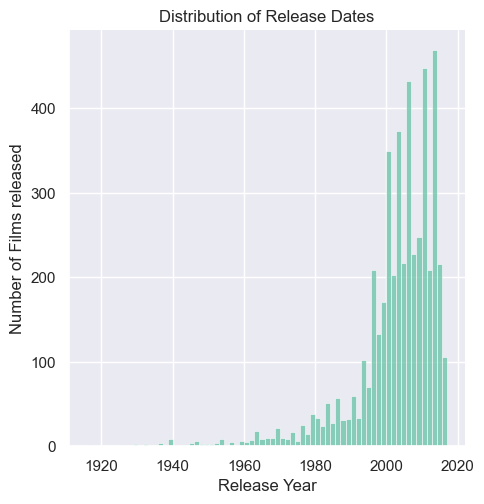

In [21]:
sns.displot(df['year'])
plt.xlabel('Release Year')
plt.ylabel('Number of Films released')
plt.title('Distribution of Release Dates')
plt.show() # we could consider off cutting movies before 1960 or even 1990 to get a more accurate view of modern trends and fewer outliers

For our film dataset the release dates range from September 1916 to Februrary 2017. How complete is it?

In [22]:
disney_df = df[df['primary_production_company'] == 'Walt Disney Pictures'].copy()
disney_df.sort_values('year', ascending=True).head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,profit,genres_list,primary_genre,primary_production_company,production_country,year
4050,2280000.0,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://movies.disney.com/fantasia,756,"[{""id"": 3537, ""name"": ""orchestra""}, {""id"": 578...",en,Fantasia,Walt Disney's timeless masterpiece is an extra...,32.875469,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,The most sensational sound you'll ever see!,Fantasia,7.2,808.0,81040000.0,"[Animation, Family, Music]",Animation,Walt Disney Pictures,United States of America,1940.0
3215,NaN,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 10751...",NaN,71805,"[{""id"": 2041, ""name"": ""island""}, {""id"": 3799, ...",en,Håkon Håkonsen,A young Norwegian boy in 1850s England goes to...,0.702971,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,NaN,Shipwrecked,6.1,14.0,NaN,"[Adventure, Family]",Adventure,Walt Disney Pictures,United States of America,1990.0


Just as a point of reference, we only actually have one Disney movie which is pre-1990 whereas Disney produced [203 films](https://d23.com/list-of-disney-films/) before 1990. So we are missing a lot of information.

### 2.2 Genres

What are the most common, profitable and popular genres? First we'll look at genre frequency.

In [23]:
genre_counts = all_genres['genres_list'].value_counts()

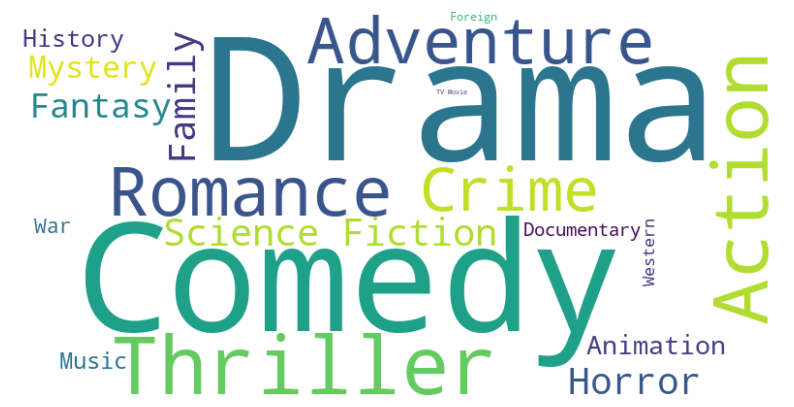

In [24]:
wordcloud = WordCloud(width = 800, height = 400, background_color ='white')

# Generate the word cloud using genre frequencies
wordcloud.generate_from_frequencies(genre_counts)
plt.figure(figsize=(10, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
# genre_counts2 = df['primary_genre'].value_counts()
# wordcloud = WordCloud(width = 800, height = 400, background_color ='white')

# wordcloud.generate_from_frequencies(genre_counts2)
# plt.figure(figsize=(10, 15))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

Drama and Comedy stand out as the genres featured in films most often.

In [26]:
# average profit by genre
all_genres.groupby('genres_list')['profit'].mean().sort_values(ascending=False).head(8)

genres_list
Animation          1.980907e+08
Adventure          1.707142e+08
Fantasy            1.626755e+08
Family             1.575881e+08
Science Fiction    1.259568e+08
Action             1.144244e+08
Comedy             7.232391e+07
Thriller           6.923375e+07
Name: profit, dtype: float64

In [27]:
# average budget
all_genres.groupby('genres_list')['budget'].mean().sort_values(ascending=False).head(8)

genres_list
Animation          7.477414e+07
Adventure          7.287652e+07
Fantasy            7.110738e+07
Family             6.346124e+07
Action             5.856493e+07
Science Fiction    5.841699e+07
War                3.848995e+07
Thriller           3.795666e+07
Name: budget, dtype: float64

On average, our top performing categories are Animation, Adventure, Fantasy and Family.

In [28]:
# total profit by genre
genre_sum_profit = all_genres.groupby('genres_list')['profit'].sum().sort_values(ascending=False).head(8)

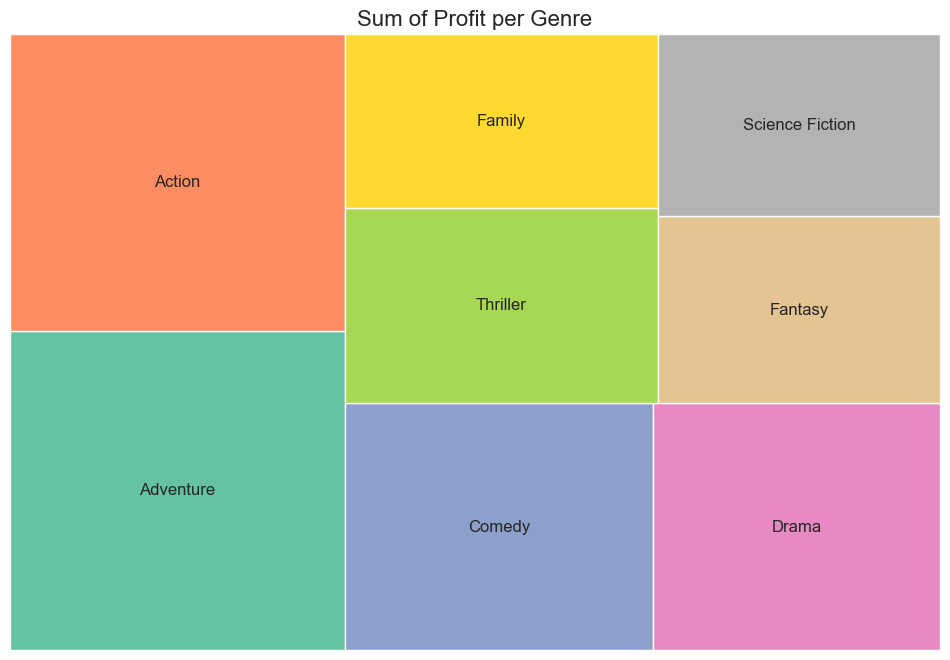

In [59]:
plt.figure(figsize=(12, 8))

# This is more for proportion of market share, so no numeric labels
squarify.plot(sizes=genre_sum_profit.values, label=genre_sum_profit.index, color = sns.color_palette("Set2"))
plt.axis('off')
plt.title('Sum of Profit per Genre', fontsize=16)
plt.show()

Despite Comedy and Drama being the most frequently produced genres, Action and Adventure genres achieve higher average profits,\
securing larger proportions of the market share. Drama is a surprisingly well performing category. It's possible that rather\
than being the primary genre it's often attached as an additional tag, giving it disproportionate representation. We can see\
looking at the difference in counts for drama overall vs drama as the primary genre that this is the case. A similar thing happens\
with comedy. 

In [30]:
# Primary genre counts vs overall genre occurrences 
print(all_genres['genres_list'].value_counts())
print(df['primary_genre'].value_counts())

Drama              2297
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Fantasy             424
Mystery             348
Animation           234
History             197
Music               185
War                 144
Documentary         110
Western              82
Foreign              34
TV Movie              8
Name: genres_list, dtype: int64
Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: pr

### 2.3 What do ratings mean?
* Is there a correlation between profit and average rating (vote_average)?
* Are certain genres in better rated on average?

### Keypoint 1 - There is not a strong correlation between rating and revenue or rating and budget

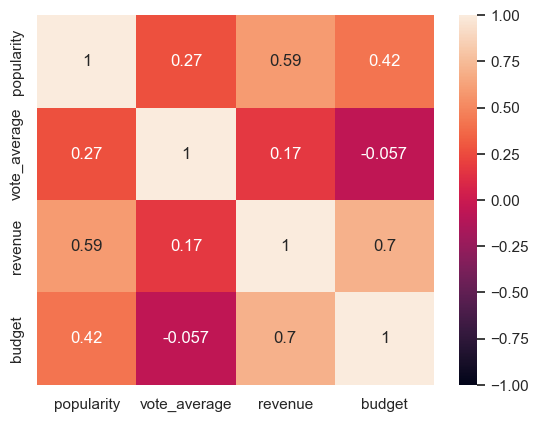

In [61]:
low_vote_count_threshold = df['vote_count'].quantile(0.25)
df_votes = df[df['vote_count'] > low_vote_count_threshold]
vote_corr = df_votes[['popularity', 'vote_average', 'revenue', 'budget']].corr()
sns.heatmap(vote_corr, annot=True,vmin=-1, vmax=1)
plt.show()

vote_average or the average rating of a movie does not correlate with any real strength to either revenue or budget in general. This, perhaps\
surprisingly, means that we don't really see a relationship between the budget spent by the production company and the perceived quality\
of a film. However, the motivation here is clear as there is quite a strong correlation between budget and revenue. We'll explore this further\
in the context of action films in section 3.2.

In [32]:
avg_rating_genre = all_genres.groupby('genres_list')['vote_average'].mean().reset_index()
avg_rating_genre = avg_rating_genre.sort_values('vote_average', ascending=False).head(10)

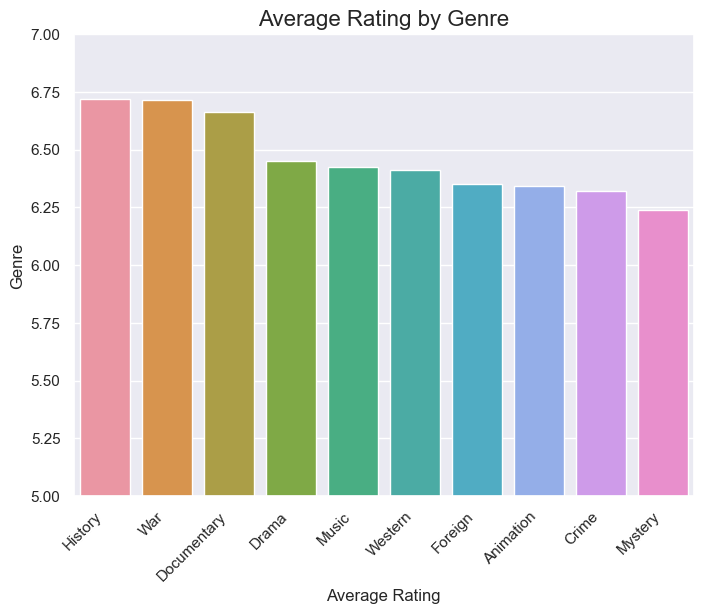

In [33]:
plt.figure(figsize=(8, 6))

sns.barplot(y='vote_average', x='genres_list', data=avg_rating_genre)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.ylim(5, 7)
plt.title('Average Rating by Genre', fontsize=16)
plt.show()

The top genres which are highly rated apart from Animation don't tend to be those that perform as well in revenue or are as popular.\
This may be contributing to the weaker correlation between rating and revenue.

### 2.4 Exploration by Production Company 
We're first going to look at which production companies are producing the most films then we'll see which are generating the largest revenues both in total and on average.

In [60]:
# number of films produced by each production company
df['primary_production_company'].value_counts()

Paramount Pictures                            281
Universal Pictures                            260
Columbia Pictures                             200
Twentieth Century Fox Film Corporation        177
New Line Cinema                               157
                                             ... 
Australian Film Finance Corporation (AFFC)      1
Stanley Kubrick Productions                     1
Palpable Productions                            1
Nelson Entertainment                            1
rusty bear entertainment                        1
Name: primary_production_company, Length: 1313, dtype: int64

In [35]:
df_w_revenue = df.dropna(subset=['revenue'])
top_6_companies = df_w_revenue['primary_production_company'].value_counts().nlargest(6).index
top_6_companies = df_w_revenue[df_w_revenue['primary_production_company'].isin(top_6_companies)].sort_values('revenue', ascending=False)
df_sum_revenue = top_6_companies.groupby('primary_production_company', as_index=False)['revenue'].sum().sort_values('revenue')
df_avg_revenue = top_6_companies.groupby('primary_production_company', as_index=False)['revenue'].mean().sort_values('revenue')

### Keypoint 2 - Paramount is the best performing Production Company by Revenue

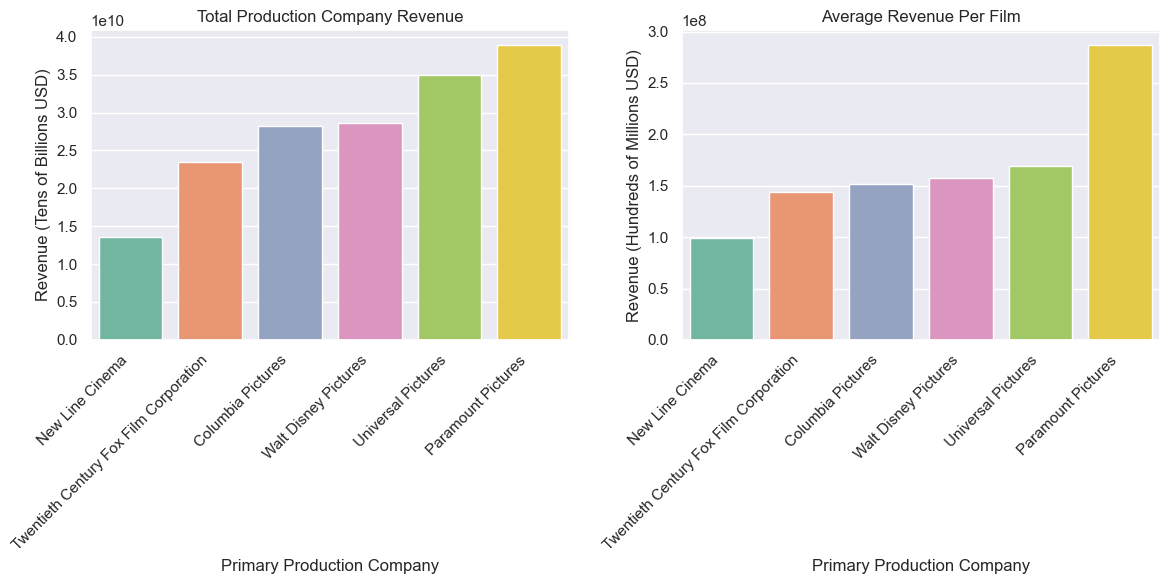

In [36]:
# Subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x = 'primary_production_company', y = 'revenue', data=df_sum_revenue, ax=axes[0])#errorbar=None
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")

# Total revenue by Company 
axes[0].set_ylabel('Revenue (Tens of Billions USD)')
axes[0].set_xlabel('Primary Production Company')
axes[0].set_title('Total Production Company Revenue')

# Average revenue by Company 
sns.barplot(x = 'primary_production_company', y = 'revenue', data=df_avg_revenue, ax=axes[1])
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")
axes[1].set_ylabel('Revenue (Hundreds of Millions USD)')
axes[1].set_xlabel('Primary Production Company')
axes[1].set_title('Average Revenue Per Film')

plt.tight_layout()
plt.show()

#### What differentiates Paramount Pictures from Universal Pictures? 
We haven't yet addressed all of these points or questions
* Both production companies were started around the [same time](https://en.wikipedia.org/wiki/Major_film_studios)
* Paramount produced 281 Films, 21 more than Universal but their average is also higher
* Paramount has 10 more Science Fiction films which tend to perform well w.r.t. revenue
* Is the distribution the same? 
* Do Paramount have higher budget films?

In [37]:
df[df["primary_production_company"] == 'Paramount Pictures']['primary_genre'].value_counts()

Comedy             61
Action             55
Drama              52
Adventure          24
Horror             18
Science Fiction    17
Crime              13
Thriller            9
Animation           8
Fantasy             7
Romance             3
Music               3
War                 3
Mystery             2
Documentary         2
Western             2
History             1
Family              1
Name: primary_genre, dtype: int64

In [38]:
df[df["primary_production_company"] == 'Universal Pictures']['primary_genre'].value_counts()

Comedy             67
Action             48
Drama              47
Adventure          27
Horror             19
Fantasy            11
Crime               9
Science Fiction     7
Romance             7
Thriller            6
Animation           4
Mystery             3
Family              1
War                 1
History             1
Music               1
Western             1
Name: primary_genre, dtype: int64

#### What's interesting or surprising about this? 
You may expect Disney to come out on top. Especially in recent years they've solidifed their grip on the industry. As this data only extends to early 2017 we don't see\
the full effects of their Star Wars and Marvel successes, or how films may have performed on their streaming service. There is also the incompleteness of data, we are missing a lot of films.\
We can see according to the data that Disney produces fewer movies than the others in the top 10 by revenue (total and average). With only 114 films in our data whereas Paramount has 281.

Can we see the general trend for their growth up to 2017 though? We'll plot their performance year on year

In [39]:
disney_df = disney_df[disney_df['year'] > 1945].dropna(subset=['profit']) # there's only one film pre 1990 recorded here, Fantasia
# dropna for profit drops a film if either revenue OR budget is missing

# melting data taking the year as an id
columns_to_melt = ['year', 'revenue', 'profit']
disney_melted = pd.melt(disney_df[columns_to_melt], id_vars=['year'], var_name='Type', value_name='Amount')

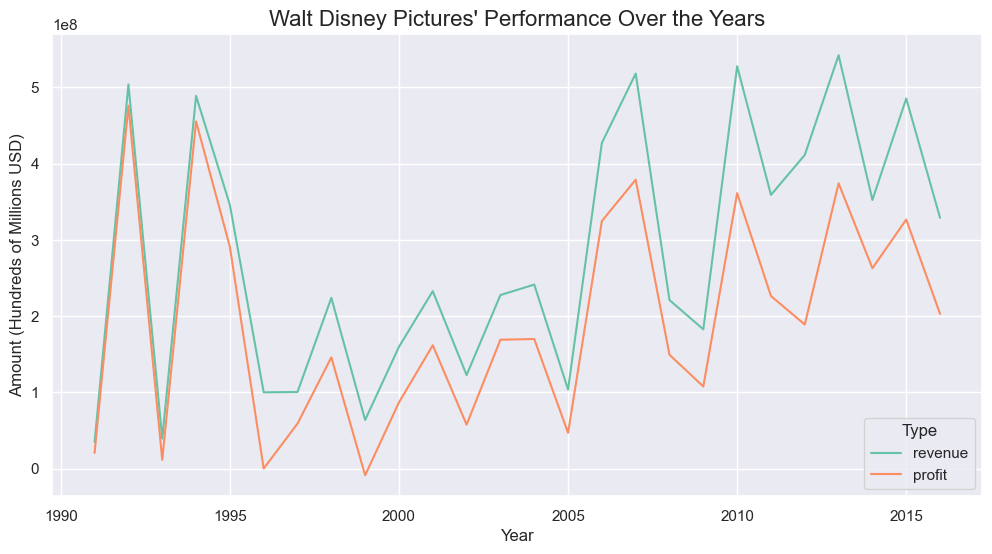

In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=disney_melted, x='year', y='Amount', hue='Type', errorbar=None)

plt.xlabel('Year')
plt.ylabel('Amount (Hundreds of Millions USD)')
plt.legend(title='Type')
plt.title("Walt Disney Pictures' Performance Over the Years", fontsize = 16)
plt.show()

1992, 1994, 2007 and 2010 were were standout years for Disney with 1999 being their worst year. We'll look at 1994 and 2010 a little closer. 

Can the amount of films produced explain the success of those years?

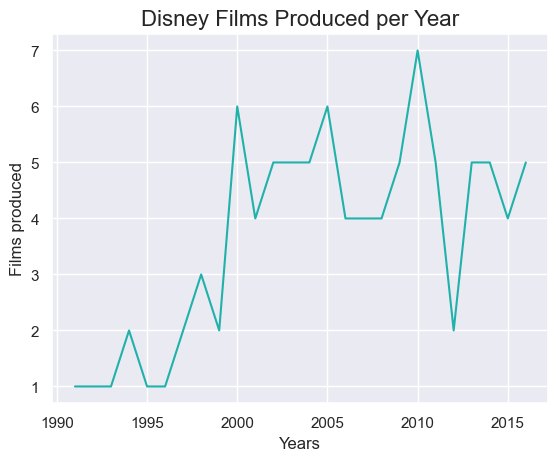

In [42]:
film_counts = disney_df.groupby('year')['title'].count().reset_index()
sns.lineplot(x = 'year', y = 'title', data = film_counts, color='lightseagreen')
plt.title('Disney Films Produced per Year', fontsize = 16)
plt.xlabel('Years')
plt.ylabel('Films produced')
plt.show()

We'll look at each significant year in more detail by the films released.

In [43]:
disney_df.loc[disney_df['year'] == 2010, ['original_title', 'revenue', 'year', 'vote_average', 'popularity', 'genres_list']].sort_values('revenue', ascending = False)

,original_title,revenue,year,vote_average,popularity,genres_list
42,Toy Story 3,1.066970e+09,2010.0,7.6,59.995418,"[Animation, Family, Comedy]"
32,Alice in Wonderland,1.025491e+09,2010.0,6.4,78.530105,"[Family, Fantasy, Adventure]"
6,Tangled,5.917949e+08,2010.0,7.4,48.681969,"[Animation, Family]"
39,TRON: Legacy,4.000628e+08,2010.0,6.3,73.795050,"[Adventure, Action, Science Fiction]"
50,Prince of Persia: The Sands of Time,3.351546e+08,2010.0,6.2,62.169881,"[Adventure, Fantasy, Action, Romance]"
103,The Sorcerer's Apprentice,2.152837e+08,2010.0,5.8,35.580815,"[Fantasy, Adventure, Action, Comedy, Drama]"
1381,Secretariat,6.025137e+07,2010.0,6.8,9.525037,[Drama]


In [44]:
disney_df.loc[disney_df['year'] == 1994, ['original_title', 'release_date', 'revenue', 'year', 'vote_average', 'popularity', 'genres_list']].sort_values('revenue', ascending = False)

,original_title,release_date,revenue,year,vote_average,popularity,genres_list
494,The Lion King,1994-06-23,788241776.0,1994.0,8.0,90.457886,"[Family, Animation, Drama]"
2019,The Santa Clause,1994-11-10,189833357.0,1994.0,6.3,16.234053,"[Fantasy, Drama, Comedy, Family]"


In [45]:
disney_df.loc[disney_df['year'] == 1999, ['original_title', 'revenue', 'year', 'vote_average', 'popularity', 'genres_list']].sort_values('revenue', ascending = False)

,original_title,revenue,year,vote_average,popularity,genres_list
465,Fantasia 2000,90874570.0,1999.0,7.0,14.530946,"[Animation, Family, Music]"
752,My Favorite Martian,36850101.0,1999.0,5.1,6.806920,"[Comedy, Drama, Family, Science Fiction]"


Zooming in on one instance, 2010, we can see a multitude of factors making up Disney's success in that year. 
* Toy Story 3's [long awaited](https://alternativemagazineonline.co.uk/2010/07/26/film-review-toy-story-3-3d-version/) release  
* 7 films released that year, higher than the average 
* The success of live action adaptations: Alice in Wonderland, Tron and Prince of Persia
* The success of the original animated IP Tangled 
* A balance of both new and old IPs

This isn't the case for their other peak years however. 1994 was entirely carried by The Lion King, a highly rated original released in June. \
It wasn't until the 2000s that they really started capitalizing with sequels, and many of those were straight to video ([source](https://en.wikipedia.org/wiki/List_of_Walt_Disney_Pictures_films)).

### 2.5 General Temporal Trends

In [46]:
df['month'] = df['release_date'].dt.month

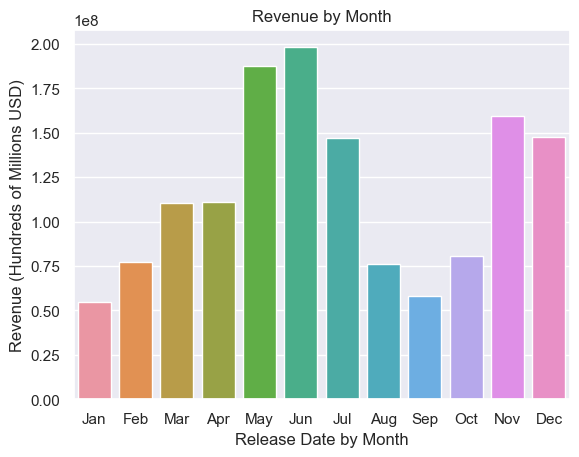

In [47]:
sns.barplot(x = 'month', y = 'revenue', data = df, errorbar=None)
plt.ylabel('Revenue (Hundreds of Millions USD)')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(len(months)), labels=months)  # Ensure the ticks and labels align
plt.xlabel('Release Date by Month')
plt.title('Revenue by Month')
plt.show()

As we'd expect we're seeing significantly better performance throughout the summer months.\
In particular in May, June and July. But also in November and December. Both periods are holiday periods.

In [48]:
avg_by_year = df.groupby('year')['vote_average'].mean().reset_index()

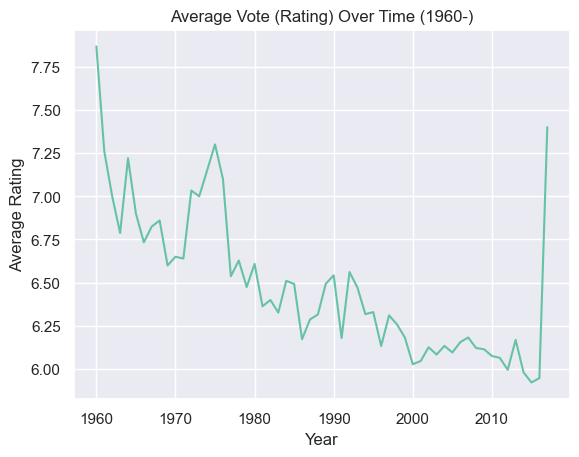

In [49]:
# Filtering the data to start from 1960 to get a clearer view of more recent trend
avg_by_year = avg_by_year[avg_by_year['year'] >= 1960]

sns.lineplot(x = 'year', y = 'vote_average', data = avg_by_year)
plt.title('Average Vote (Rating) Over Time (1960-)')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

We see the average rating of films dropping over time (the spike at the end is likely due to 2017 being truncated only including films up to February.\
We have far modern films in our data and it has become easier to produce films so that may contribute to this drop as well as phenomena like survivorship\
bias.

## 3.0 Two interesting Films
### 3.1 Most Succesful Foreign Film 
We'll first look at the most succesful foreign film by profit:

In [50]:
df[df['original_language'] != 'en'].sort_values('profit', ascending = False).head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title,vote_average,vote_count,profit,genres_list,primary_genre,primary_production_company,production_country,year,month
2294,15000000.0,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://movies.disney.com/spirited-away,129,"[{""id"": 616, ""name"": ""witch""}, {""id"": 970, ""na...",ja,千と千尋の神隠し,A ten year old girl who wanders away from her ...,118.968562,"[{""name"": ""Studio Ghibli"", ""id"": 10342}]",...,Spirited Away,8.3,3840.0,259925095.0,"[Fantasy, Adventure, Animation, Family]",Fantasy,Studio Ghibli,Japan,2001.0,7.0


In [51]:
df[df['id'] == 129][['title', 'release_date', 'genres_list']]

,title,release_date,genres_list
2294,Spirited Away,2001-07-20,"[Fantasy, Adventure, Animation, Family]"


The most succesful foreign feature film by profit is **Spirited Away** produced by Studio Ghibli. The strong vote_average and popularity\
explain some of the success even if there's a weak correlation in general. It also consists of the 4 most profitable genres: Animation,\
Adventure, Fantasy and Family and was released in July which is a high performing month. This, along with the existence of a dub with\
[high profile actors](https://www.imdb.com/title/tt0245429) could also make it more approachable as a foreign title, contributing to its success.

Spirited away is also one of only 16 Japanese language films in the dataframe. 3 of which are Studio Ghibli films. Spirited Away is by far\
the most popular of the three movies, with the highest average rating and the most succesful by a large margin.

In [52]:
df[df['primary_production_company'] == 'Studio Ghibli']

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title,vote_average,vote_count,profit,genres_list,primary_genre,primary_production_company,production_country,year,month
1471,41677699.0,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",NaN,12429,"[{""id"": 456, ""name"": ""mother""}, {""id"": 1357, ""...",ja,崖の上のポニョ,"The son of a sailor, 5-year old Sosuke lives a...",39.586760,"[{""name"": ""Studio Ghibli"", ""id"": 10342}, {""nam...",...,Ponyo,7.5,926.0,145801819.0,"[Animation, Family]",Animation,Studio Ghibli,Japan,2008.0,7.0
1987,24000000.0,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 16, ""na...",NaN,4935,"[{""id"": 334, ""name"": ""flying""}, {""id"": 616, ""n...",ja,ハウルの動く城,"When Sophie, a shy young woman, is cursed with...",49.549984,"[{""name"": ""Studio Ghibli"", ""id"": 10342}, {""nam...",...,Howl's Moving Castle,8.2,1991.0,210710455.0,"[Fantasy, Animation, Adventure]",Fantasy,Studio Ghibli,Japan,2004.0,11.0
2294,15000000.0,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://movies.disney.com/spirited-away,129,"[{""id"": 616, ""name"": ""witch""}, {""id"": 970, ""na...",ja,千と千尋の神隠し,A ten year old girl who wanders away from her ...,118.968562,"[{""name"": ""Studio Ghibli"", ""id"": 10342}]",...,Spirited Away,8.3,3840.0,259925095.0,"[Fantasy, Adventure, Animation, Family]",Fantasy,Studio Ghibli,Japan,2001.0,7.0


In [53]:
df['original_language'].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

df.columns

### 3.2 A surprising flop?
We explore the lowest rated movies with a signiifcant number of votes to note any surprising flops.

In [54]:
# df_votes is our dataframe filtered so that only films with a number of votes in 
# the upper 3 quartiles are present 
df_votes.sort_values('vote_average', ascending = True).head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,profit,genres_list,primary_genre,primary_production_company,production_country,year
1652,100000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,14164,"[{""id"": 3436, ""name"": ""karate""}, {""id"": 9715, ...",en,Dragonball Evolution,The young warrior Son Goku sets out on a quest...,21.677732,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,The legend comes to life.,Dragonball Evolution,2.9,462.0,NaN,"[Action, Adventure, Fantasy, Science Fiction, ...",Action,Ingenious Film Partners,United States of America,2009.0
2194,25000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",http://www.disastermovie.net/,13805,"[{""id"": 5096, ""name"": ""natural disaster""}, {""i...",en,Disaster Movie,"In DISASTER MOVIE, the filmmaking team behind ...",16.238961,"[{""name"": ""Grosvenor Park Media Ltd."", ""id"": 2...",...,Your favorite movies are going to be destroyed.,Disaster Movie,3.0,240.0,-10890716.0,"[Action, Comedy]",Action,Grosvenor Park Media Ltd.,United States of America,2008.0
480,44000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",NaN,5491,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,Battlefield Earth,"In the year 3000, man is no match for the Psyc...",7.891470,"[{""name"": ""Franchise Pictures"", ""id"": 1403}, {...",...,Take Back The Planet,Battlefield Earth,3.0,255.0,-22600000.0,"[Action, Science Fiction, War]",Action,Franchise Pictures,United States of America,2000.0
2237,20000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 14, ""nam...",NaN,12142,"[{""id"": 703, ""name"": ""detective""}, {""id"": 1299...",en,Alone in the Dark,Edward Carnby is a private investigator specia...,9.292987,"[{""name"": ""Boll Kino Beteiligungs GmbH & Co. K...",...,Can mankind defeat the army of darkness unleas...,Alone in the Dark,3.1,173.0,-9557192.0,"[Action, Fantasy, Horror, Thriller]",Action,Boll Kino Beteiligungs GmbH & Co. KG,Canada,2005.0
1265,40000000.0,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",NaN,9544,"[{""id"": 4776, ""name"": ""race against time""}, {""...",en,FearDotCom,"With four corpses on his hands, New York City ...",6.756886,"[{""name"": ""Milagro Films"", ""id"": 1070}, {""name...",...,The last site you'll ever see.,FearDotCom,3.2,105.0,-21097985.0,"[Horror, Thriller]",Horror,Milagro Films,Germany,2002.0


In [55]:
action_films = all_genres[all_genres['genres_list'] == 'Action']
round(action_films[action_films['budget'].notna()]['budget'].mean(), 2)

58564932.61

In [56]:
action_films[['budget', 'revenue', 'vote_average']].corr()

,budget,revenue,vote_average
budget,1.000000,0.732262,0.105561
revenue,0.732262,1.000000,0.317965
vote_average,0.105561,0.317965,1.000000


Most of these are notable flops but we'll pick out **Dragonball Evolution**. Dragonball itself is a [huge property](https://en.wikipedia.org/wiki/Dragon_Ball), likely contributing to the films popularity\
in the data, and it apparently had a significant 100 million USD budget against the average action film budget of around 60 million USD. However, according to\
[wikipedia](https://en.wikipedia.org/wiki/Dragonball_Evolution) the actual budget was close to 30 million USD. Making it a lower budget production which we would expect to be linked to a lower rating and lower\
revenue as for action films, we see a significant correlation between budget and revenue. It also has a higher than average amount of genres and confused keywords.\
Keywords like "karate," which may point to an issue in the marketing or the identity of the film but we don't have data for that here.

In [57]:
lower_bound = 30000000 * 0.9
upper_bound = 30000000 * 1.1
films_30m_budget = action_films[(action_films['budget'] >= lower_bound) & (action_films['budget'] <= upper_bound)]
films_30m_budget['revenue'].mean()

86146173.5

In [58]:
df[df['id'] == 14164]['release_date']

1652   2009-04-01
Name: release_date, dtype: datetime64[ns]

Dragonball Evolution actually generated [56.5 million USD](https://www.the-numbers.com/movie/Dragonball-Evolution#tab=summary) in revenue. We've compared this to other action films within 10% of Dragonball's budget\
and it had performed badly against those 77 films as the budget, average rating and April release of the film may have lead us to believe.\
Though, it may have been that the production company considered it a weak offering already and so released it off-season. Research further.